<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Парсинг-данных" data-toc-modified-id="Парсинг-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Парсинг данных</a></span></li><li><span><a href="#Работа-с-базой-данных" data-toc-modified-id="Работа-с-базой-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Работа с базой данных</a></span></li><li><span><a href="#Аналитика-средствами-Python" data-toc-modified-id="Аналитика-средствами-Python-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Аналитика средствами Python</a></span><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#ТОП-10-городов-и-построение-графиков" data-toc-modified-id="ТОП-10-городов-и-построение-графиков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>ТОП-10 городов и построение графиков</a></span></li><li><span><a href="#Диаграмма-моделей-самолетов-и-количества-рейсов" data-toc-modified-id="Диаграмма-моделей-самолетов-и-количества-рейсов-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Диаграмма моделей самолетов и количества рейсов</a></span></li><li><span><a href="#Диаграмма-городов-и-количества-рейсов" data-toc-modified-id="Диаграмма-городов-и-количества-рейсов-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Диаграмма городов и количества рейсов</a></span></li><li><span><a href="#Диаграмма-ТОП-10-городов-и-количества-рейсов" data-toc-modified-id="Диаграмма-ТОП-10-городов-и-количества-рейсов-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Диаграмма ТОП-10 городов и количества рейсов</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Предпочтения пользователей, покупающих авиабилеты
Проводится исследование для российской авиакомпании "F9", выполняющей сотни внутренних пассажирских авиаперевозок каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления. Проанализировать спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

## Парсинг данных
Напишу парсер для сбора с веб-ресурса данных о 11 крупнейших фестивалях 2018 года

In [1]:
# Импорт библиотек
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Получение информации с веб-страницы
URL = 'https://....html'
req = requests.get(URL)
print(req.status_code) # Проверка ответа

200


In [3]:
# Создание датасета из выгруженных данных
soup = BeautifulSoup(req.text, 'lxml')
table = soup.find('table', attrs = {'id':'best_festivals'})

heading_table = []
for row in table.find_all('th'):
    heading_table.append(row.text)

content = []
for row in table.find_all('tr'):
    if not row.find_all('th'): 
        content.append([element.text for element in row.find_all('td')])

festivals = pd.DataFrame(content, columns=heading_table)
print(festivals)

                                  Название фестиваля Место проведения  \
0               Музыкальный фестиваль «Усадьба Jazz»     Екатеринбург   
1   Фестиваль музыки и технологий Alfa Future People  Нижний Новгород   
2                        Фестиваль еды «О, да! Еда!»  Санкт-Петербург   
3                                          Доброфест        Ярославль   
4                                          Park Live           Москва   
5                                       Пикник Афиши           Москва   
6                                            VK FEST  Санкт-Петербург   
7                            Фестиваль «О, да! Еда!»          Иркутск   
8                            Фестиваль «О, да! Еда!»      Владивосток   
9                                            Видфест           Москва   
10                                  «Нашествие 2018»            Тверь   

   Дата проведения  
0       01.07.2018  
1       10.08.2018  
2       21.07.2018  
3       29.07.2018  
4       28.07.2018

**Вывод**

Получен датасет с информацией о фестивалях в 2018 году.

## Работа с базой данных
SQL запросами определю основные данные и подготовлю датасеты для дальнейшего исследования в python.

**Описание таблиц**

Таблица airports — информация об аэропортах:
- `airport_code` — трёхбуквенный код аэропорта,
- `airport_name` — название аэропорта,
- `city` — город,
- `timezone` — часовой пояс.

Таблица aircrafts — информация о самолётах:
- `aircraft_code` — код модели самолёта,
- `model` — модель самолёта,
- `range` — дальность полётов.

Таблица tickets — информация о билетах:
- `ticket_no` — уникальный номер билета,
- `passenger_id` — уникальный идентификатор пассажира,
- `passenger_name` — имя и фамилия пассажира.

Таблица flights — информация о рейсах:
- `flight_id` — уникальный идентификатор рейса,
- `departure_airport` — аэропорт вылета,
- `departure_time` — дата и время вылета,
- `arrival_airport` — аэропорт прилёта,
- `arrival_time` — дата и время прилёта,
- `aircraft_code` — уникальный идентификатор самолёта.

Таблица ticket_flights — стыковая таблица «рейсы-билеты»:
- `ticket_no` — номер билета,
- `flight_id` — уникальный идентификатор рейса.

Таблица festivals — информация о фестивалях:
- `festival_id` — уникальный номер фестиваля,
- `festival_date` — дата проведения фестиваля,
- `festival_city` — город проведения фестиваля,
- `festival_name` — название фестиваля.

`1. Определю города, в которых есть аэропорты:`

``` SQL
SELECT DISTINCT
    city
FROM
    airports;
```

**Результат**  

| City |
|:-----:|
| Липецк |
| Оренбург |
| Южно-Сахалинск |
| Красноярск |
| Калуга |
| Уфа |
| Новый Уренгой |
| Нарьян-Мар |
| Белгород |
| Нерюнгри |
| ... |
| Курган |
| Ноябрьск |
| Архангельск |
| Ижевск |
| Владивосток |

`2. Определю количество вылетов из каждого аэропорта:`

```sql
SELECT
    departure_airport,
    COUNT(flight_id) AS cnt_flights
FROM
    flights
GROUP BY
    departure_airport
ORDER BY
    cnt_flights DESC;
```

**Результат**

| departure_airport | cnt_flights |
| :-----:|:-----:|
| DME | 6376 |
| SVO | 5912 |
| LED | 3769 |
| VKO | 3405 |
| OVB | 2091 |
| KJA | 1401 |
| SVX | 1367 |
| PEE | 1228 |
| ROV | 1227 |
| BZK | 1210 |
| ... | ... |
| PKC | 52 |
| NYA | 51 |
| PYJ | 51 |
| KXK | 35 |
| USK | 34 |

`3. Определю количество вылетов на каждой модели самолёта с вылетом в сентябре 2018 года:`

```sql
SELECT
    aircrafts.model AS model,
    COUNT(flights.flight_id) AS flights_amount
FROM
    (
    SELECT
        flight_id,
        departure_airport,
        departure_time,
        arrival_airport,
        arrival_time,
        aircraft_code
    FROM
        flights
    WHERE
        CAST(DATE_TRUNC('month', flights.departure_time) AS date) = '2018-09-01') AS flights
    LEFT JOIN aircrafts ON flights.aircraft_code = aircrafts.aircraft_code
GROUP BY
    aircrafts.model;
```

**Результат**

| model | flights_amount |
| :----- | :-----: |
| Airbus A319-100 | 607 |
| Airbus A321-200 | 960 |
| Boeing 737-300 | 630 |
| Boeing 767-300 | 600 |
| Boeing 777-300 | 300 |
| Bombardier CRJ-200 | 4446 |
| Cessna 208 Caravan | 4557 |
| Sukhoi SuperJet-100 | 4185 |


`4. Определю количество рейсов по всем моделям самолётов Boeing, Airbus а другие объединю в категорию 'other' в сентябре:`

```sql
SELECT
    COUNT(flights.flight_id) AS flights_amount,
    CASE WHEN aircrafts.model LIKE 'Boeing%' THEN 'Boeing'
    WHEN aircrafts.model LIKE 'Airbus%' THEN 'Airbus'
    ELSE 'other'
    END AS type_aircraft
FROM
    (
    SELECT
        flight_id,
        aircraft_code
    FROM
        flights
    WHERE
        CAST(DATE_TRUNC('month', flights.departure_time) AS date) = '2018-09-01') AS flights
    LEFT JOIN aircrafts ON flights.aircraft_code = aircrafts.aircraft_code
GROUP BY
    type_aircraft;
```

**Результат**

| flights_amount | type_aircraft |
| :-----: | :-----|
| 1567 | Airbus |
| 1530 | Boeing |
| 13188 | other |


`5. Определю количество прибывающих рейсов в день для каждого города за август 2018 года:`

```sql
SELECT
    Q.city,
    AVG(Q.light_id_day_cnt) AS average_flights
FROM
    (
    SELECT
        city,
        EXTRACT(day FROM flights.arrival_time) AS day_number,
        COUNT(flights.flight_id) AS light_id_day_cnt
    FROM
        flights
        INNER JOIN airports ON flights.arrival_airport = airports.airport_code
    WHERE
        EXTRACT(month FROM flights.arrival_time) = '08'
    GROUP BY
        airports.city,
        EXTRACT(day FROM flights.arrival_time)) AS Q
GROUP BY
    Q.city
ORDER BY
    average_flights DESC;
```

**Результат**

| city | average_flights |
| :----- | :-----: |
| Москва | 129.774 |
| Санкт-Петербург | 31.1613 |
| Новосибирск | 17.3226 |
| Красноярск | 11.5806 |
| Екатеринбург | 11.3226 |
| Ростов-на-Дону | 10.1935 |
| Пермь | 10.129 |
| Брянск | 10 |
| Сочи | 9.6129 |
| Ульяновск | 9.58065 |
| ... | ... |
| Нефтеюганск | 1 |
| Петропавловск-Камчатский | 1 |
| Усинск | 1 |
| Усть-Кут | 1 |
| Братск | 1 |

`6. Определю фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве, и номер недели, в которую они проходили:`

```sql
SELECT
    festival_name,
    EXTRACT(week FROM festival_date) AS festival_week
FROM
    festivals
WHERE
    festival_date BETWEEN '2018-07-23' AND '2018-09-30'
    AND festival_city = 'Москва';
```

**Результат**

| festival_name | festival_week |
| :---- | :----: |
| Park Live | 30 |
| Пикник Афиши | 31 |
| Видфест | 36 |

`7. Определю для каждой недели с 23 июля по 30 сентября 2018 года количество билетов, купленных на рейсы в Москву. Добавлю в таблицу номер недели ещё раз, если в эту неделю проходил фестиваль, и nan, если не проходил; а также название фестиваля.`

```sql
SELECT
    SBQ1.week_number AS week_number,
    SBQ1.ticket_amount AS ticket_amount,
    SBQ2.festival_week AS festival_week,
    SBQ2.festival_name AS festival_name
FROM
    (SELECT
        EXTRACT(week FROM flights.arrival_time) AS week_number,
        COUNT(ticket_flights.ticket_no) AS ticket_amount
    FROM
        flights
        INNER JOIN airports ON airports.airport_code = flights.arrival_airport
        INNER JOIN ticket_flights ON ticket_flights.flight_id = flights.flight_id
    WHERE
        airports.city = 'Москва'
        AND flights.arrival_time::date BETWEEN '2018-07-23' AND '2018-09-30'
    GROUP BY
        EXTRACT(week FROM flights.arrival_time)) AS SBQ1
LEFT JOIN
    (SELECT
         EXTRACT(week FROM festival_date) AS festival_week,
         festival_name
     FROM
         festivals
     WHERE
         festival_city = 'Москва'
         AND festival_date BETWEEN '2018-07-23' AND '2018-09-30'
    ) AS SBQ2
    ON SBQ1.week_number = SBQ2.festival_week
ORDER BY
    week_number ASC;
```

**Результат**

| week_number | ticket_amount | festival_week | festival_name |
| :-----: | :-----: |  :-----: |  :-----: |
| 30 | 43568 | 30 | Park Live |
| 31 | 51034 | 31 | Пикник Афиши |
| 32 | 51675 | nan |  |
| 33 | 51378 | nan |  |
| 34 | 51492 | nan |  |
| 35 | 51360 | nan |  |
| 36 | 51386 | 36 | Видфест |
| 37 | 51670 | nan |  |
| 38 | 51518 | nan |  |
| 39 | 51623 | nan |  |

**Выводы**

Определены количество вылетов из каждого аэропорта за 2018 год. 10 Самыми популярными являются аэропорты: DME, SVO, LED, VKO, OVB, KJA, SVX, PEE, ROV, BZK.

Определены количество вылетов на каждой модели самолёта. Моделями с самым большим количеством вылетов являются: Bombardier CRJ-200, Cessna 208 Caravan, Sukhoi SuperJet-100.

На самолётах моделей Airbus было совершено 1567 вылетов, на Boeing1530, на всех остальных 13188 вылетов.

Определено среднее количество прибывающих рейсов в день для каждого города за август 2018 года. 10 Самыми нагруженными городами являются: Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск.

Определены фестивали, которые проходили с 23 июля по 30 сентября 2018 года в Москве: Park Live, Пикник Афиши, Видфест.

Подготовлена таблица с количеством проданных билетов и неделями когда проходил фестиваль или когда фестивалей не было.

## Аналитика средствами Python
Используя полученные раннее данные из базы данных, проанализирую спрос пассажиров на рейсы в города, где проходят крупнейшие фестивали.

### Загрузка и изучение данных

Отключение вывода в прокручиваемом окне:

In [4]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [5]:
# Команда для игнорирования предупреждений 
import warnings
warnings.filterwarnings('ignore')

In [6]:
try:
    df_1 = pd.read_csv('/datasets/query_1.csv')
    df_2 = pd.read_csv('/datasets/query_3.csv')
except:
    df_1 = pd.read_csv('D:/DF_practicum/5/query_1.csv')
    df_2 = pd.read_csv('D:/DF_practicum/5/query_3.csv')

**Описание данных**

В df_1 содержится следующая информация:

- `model` — модели самолета
- `flights_amount` — количество рейсов для каждой модели самолетов в сентябре 2018 года

In [7]:
display(df_1)
print(df_1.info())

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   model           8 non-null      object
 1   flights_amount  8 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes
None


В df_2 содержится следующая информация:
- `city` — город
- `average_flights` — среднее количество рейсов, прибывающих в город city за день в августе 2018 года

In [8]:
display(df_2)
print(df_2.info())

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   city             101 non-null    object 
 1   average_flights  101 non-null    float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB
None


**Выводы**

- В данных пропусков нет
- В столбце average_flights необходимо округлить значения
- В столбцах model и city присутствуют заглавные буквы

### ТОП-10 городов и построение графиков

In [9]:
# Округление
df_2['average_flights'] = round(df_2['average_flights'], 2)
# Топ-10 городов
df_top_10_city = df_2.sort_values(by = 'average_flights', ascending = False).head(10)
display(df_top_10_city)

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


### Диаграмма моделей самолетов и количества рейсов

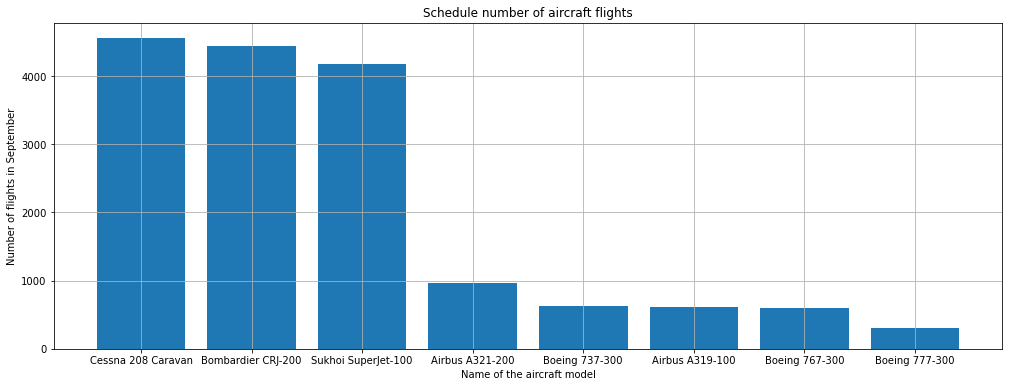

In [10]:
# Сортировка данных по убыванию
df_1 = df_1.sort_values(by='flights_amount', ascending=False)

# Построение столбчатой диаграммы
fig_1, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (17, 6))
axes.bar(df_1['model'], df_1['flights_amount'])
axes.set_title('Schedule number of aircraft flights')
axes.set_xlabel('Name of the aircraft model')
axes.set_ylabel('Number of flights in September')
axes.grid()

**Выводы**

Самолёты Cessna 208 Caravan, Bombardier CRJ-200, Sukhoi SuperJet-100 в сентябре совершили больше всех рейсов 4557, 446, 4185 соответственно. В то время как остальные модели совершали менее 1000 полётов в сентябре. Но вместительность этих трёх моделей от 10 до 50 пассажиров, а у моделей Boeing и Airbus от 150 до 450 пассажиров.

Маленькие самолёты совершают намного больше рейсов, что бы перевозить людей по менее популярным маршрутам, там, где нет смысла использовать вместительные самолёты, в то время как Boeing и Airbus летают реже, но за раз перевозят много пассажиров на популярных рейсах.

### Диаграмма городов и количества рейсов

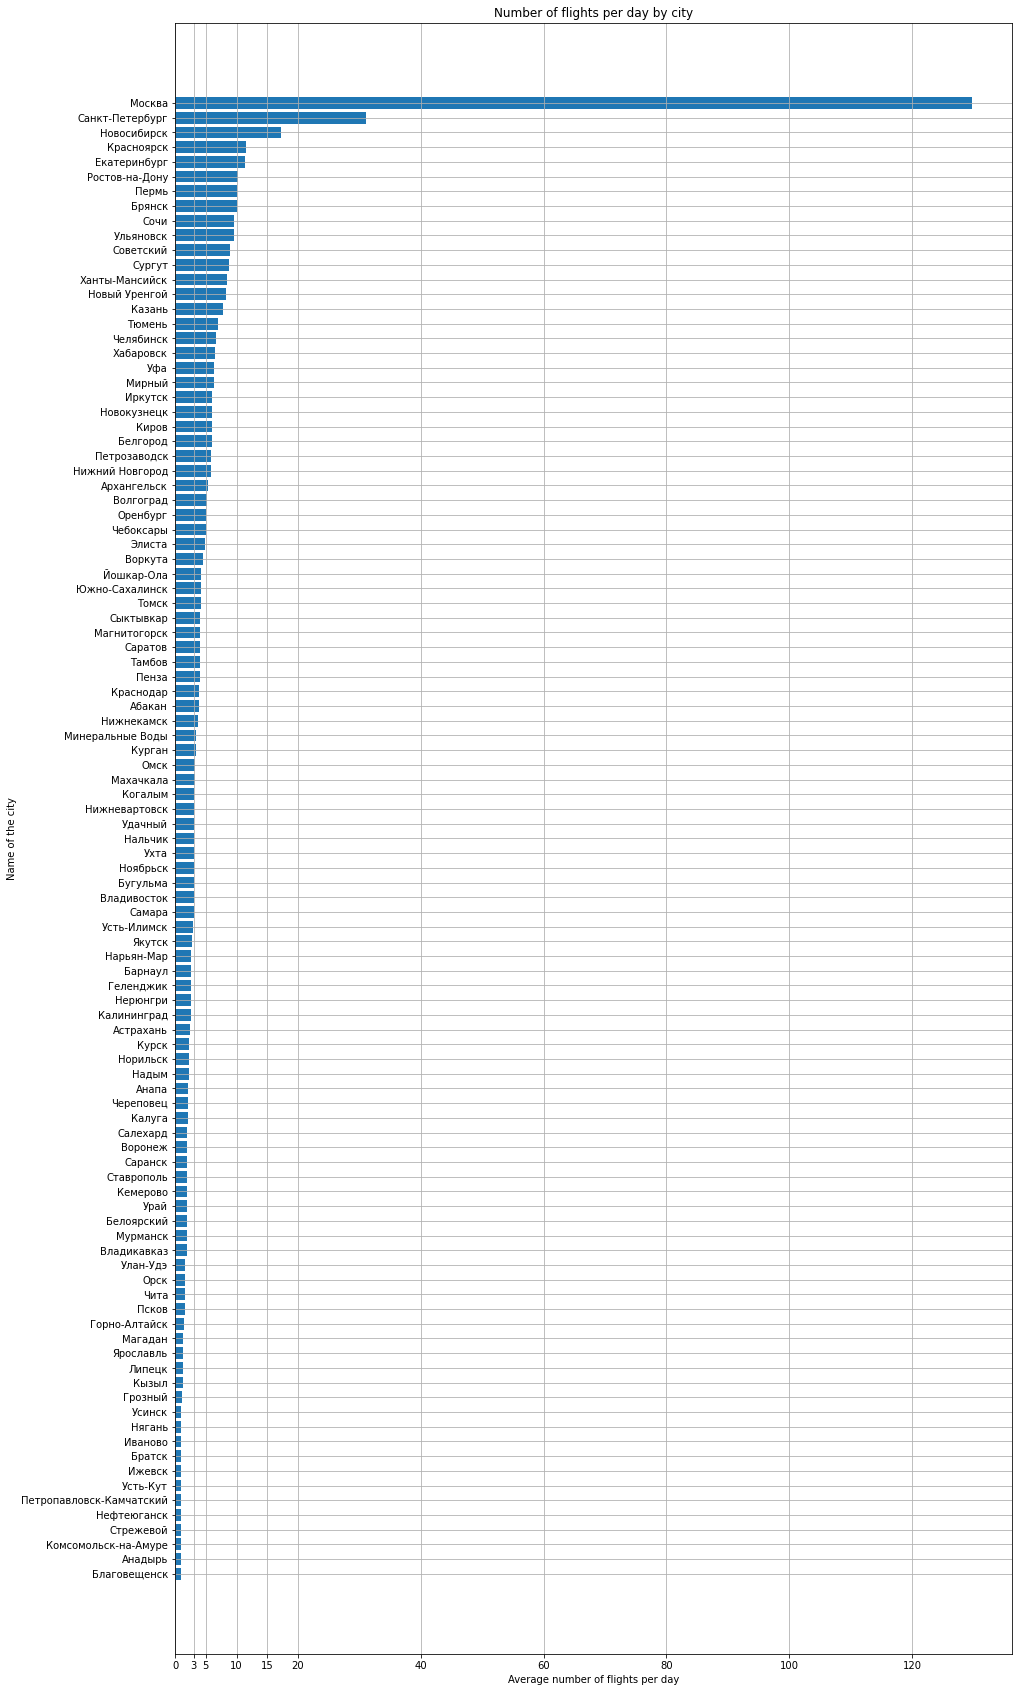

In [11]:
# Сортировка данных
df_2 = df_2.sort_values(by='average_flights')
# Построение стобчатой диаграммы
fig_2, axes=plt.subplots(nrows=1, ncols=1, figsize=(15, 30))
axes.barh(df_2['city'], df_2['average_flights'])
axes.set_title('Number of flights per day by city')
axes.set_xlabel('Average number of flights per day')
axes.set_xticks([0, 3, 5, 10, 15, 20, 40, 60, 80, 100, 120])
axes.set_ylabel('Name of the city')
axes.grid();

In [12]:
df_2.sort_values(by='average_flights', ascending=False)

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
...,...,...
9,Братск,1.00
21,Иваново,1.00
58,Нягань,1.00
86,Усинск,1.00


**Выводы**

В Москву прибывает самое большое количество рейсов в день - 130. Затем идёт Санкт-Петербург - 31 и Новосибирск - 17. Все остальные города имеют меньше 12 прилётов в день в среднем. Таким образом, аэропорты Москвы являются самыми нагруженными. Низ списка замыкают города с 1 прилётом в день.

### Диаграмма ТОП-10 городов и количества рейсов

,city,average_flights
43,Москва,129.77
70,Санкт-Петербург,31.16
54,Новосибирск,17.32
33,Красноярск,11.58
20,Екатеринбург,11.32
67,Ростов-на-Дону,10.19
63,Пермь,10.13
10,Брянск,10.00
74,Сочи,9.61
84,Ульяновск,9.58


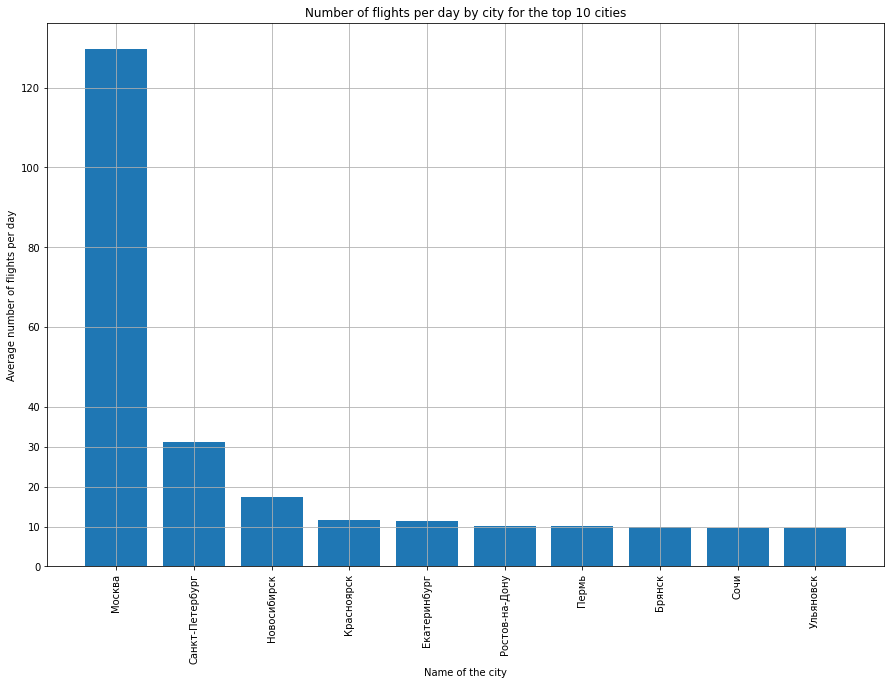

In [13]:
display(df_top_10_city)
# Построение столбчатой диаграммы
fig_3, axes=plt.subplots(nrows=1, ncols=1, figsize=(15, 10))
axes.bar(df_top_10_city['city'], df_top_10_city['average_flights'])
axes.set_title('Number of flights per day by city for the top 10 cities')
axes.set_xlabel('Name of the city')
axes.set_ylabel('Average number of flights per day')
axes.set_yticks([0, 10, 20, 30, 40, 60, 80, 100, 120])
axes.set_xticklabels(df_top_10_city['city'], rotation='vertical')
axes.grid()

**Выводы**

В топ-10 городов по количеству рейсов в день вошли: Москва, Санкт-Петербург, Новосибирск, Красноярск, Екатеринбург, Ростов-на-Дону, Пермь, Брянск, Сочи, Ульяновск. В Москве и Ульяновске 130 и 10 рейсов соответственно. При этом сильно отличающимися городами помимо Москвы являются Санкт-Петербург и Новосибирск с количеством рейсов 31 и 17 соответственно. Все остальные города имеют около 10-12 рейсов.

Сильно отличающиеся города Москва, Санкт-Петербург имеют, и самое большое население по городам в стране и являются крупнейшими экономическими и культурными центрами. Новосибирск – это крупнейший город Сибири и третий по численности в России. Из-за этого, количество рейсов в этих городах больше, чем в остальных.

## Общий вывод
Данные представлены за Август 2018 года. В этом месяце проходили 4 фестиваля "Фестиваль музыки и технологий Alfa Future People" в Нижнем Новгороде, "Пикник Афиши" в Москве, "Фестиваль «О, да! Еда!»" в Иркутске и «Нашествие 2018» в Твери. Резко выбивающихся значений среднего количества полётов относительно других городов по ним не наблюдается, за исключением Москвы. Но, Москва, город, резко отличающийся от остальных по всем параметрам, и среднее количество полётов равное 130 вызвано тем, что он является экономическим и культурным центром страны.

Проведение фестиваля существенно не влияет на среднее количество рейсов в этот город.

Маловместительные самолёты совершают больше рейсов, чем большие, такие как Boeing и Airbus. Большие самолёты, используются на популярных рейсах, что бы перевозить за раз больше пассажиров.